In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read data from csv file
df = pd.read_csv("Konkurrenzdaten_new.csv")

In [3]:
# Step 2: Group by competitor and product category, calculate mean quoted price
benchmark_df = df.groupby(['Konkurrent', 'Artikelkategorie'])['Angebotspreis'].mean().reset_index()
print(benchmark_df)

        Konkurrent         Artikelkategorie  Angebotspreis
0     Konkurrent A               3D Drucker    1509.400000
1     Konkurrent A         3D Druckmaterial      46.141764
2     Konkurrent A              AV-Receiver     816.441341
3     Konkurrent A              Abfalleimer     109.339654
4     Konkurrent A              Abfallsäcke      20.751275
...            ...                      ...            ...
7400  Konkurrent H            Zitruspressen      28.000000
7401  Konkurrent H        Zwingen & Klemmen      39.775543
7402  Konkurrent H  elektrische Zahnbürsten     112.114405
7403  Konkurrent H                     Äxte      65.662931
7404  Konkurrent H       Öl- & Essigspender      25.120000

[7405 rows x 3 columns]


In [4]:
# Step 3: Pivot the data to create a table with competitors as columns and product categories as rows
pivot_df = benchmark_df.pivot(index='Artikelkategorie', columns='Konkurrent', values='Angebotspreis')
print(pivot_df)
pivot_df.to_csv("benchmark_pivottable_Q3.csv") #optional

Konkurrent                    Konkurrent A  Konkurrent B  Konkurrent C  \
Artikelkategorie                                                         
3D Drucker                     1509.400000   1426.163068   1822.001695   
3D Druckmaterial                 46.141764     48.135827     49.309586   
AV-Receiver                     816.441341    817.325843    750.428899   
Abfalleimer                     109.339654     67.545063     77.413249   
Abfallsäcke                      20.751275     94.877368     26.269565   
...                                    ...           ...           ...   
Öl- & Essigspender               19.904643           NaN     31.476667   
Ölen & Fetten Zubehör            17.698462           NaN     20.683333   
Öler Zerstäuber & Spritzen       36.880797     10.250000     20.500000   
Übersetzer                      112.142857    112.142857           NaN   
Überwachungskamera Objektive    202.024479    199.962500    199.223301   

Konkurrent                    Konkurr

<Figure size 720x432 with 0 Axes>

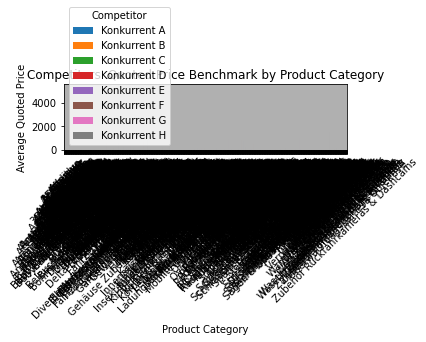

In [5]:
# Step 4: Plot the benchmark data as an overview
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar')
plt.title("Competitors' Quoted Price Benchmark by Product Category")
plt.xlabel('Product Category')
plt.ylabel('Average Quoted Price')
plt.xticks(rotation=45)
plt.legend(title='Competitor')
plt.grid(True)
plt.tight_layout()
plt.show()

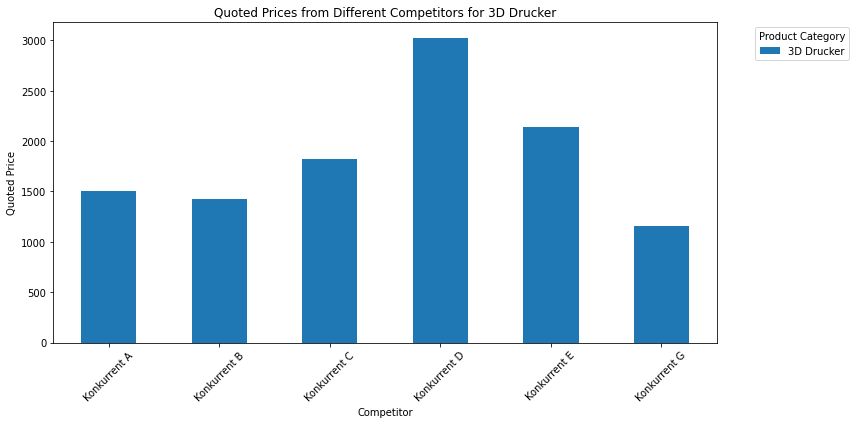

In [6]:
# Step 5: Zoom in on a specific product category to check out the quoted price differences between differernt competitors
specific_category = '3D Drucker'
specific_category_data = df[df['Artikelkategorie'] == specific_category]


specific_category_data.pivot_table(index='Konkurrent', columns='Artikelkategorie', values='Angebotspreis').plot(kind='bar', figsize=(12, 6))
plt.title(f'Quoted Prices from Different Competitors for {specific_category}')
plt.xlabel('Competitor')
plt.ylabel('Quoted Price')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
# Step 6: Make a table to indicate in each product category, which competitor got the lowest quoted price
df = pd.read_csv("benchmark_pivottable_Q3.csv")

# Create an empty DataFrame to store the results
lowest_prices_df = pd.DataFrame(columns=["Product Category", "Lowest Quoted Competitor", "Lowest Quoted Price"])

# Find out which competitor got the lowest quoted price
df['Lowest Quoted Price'] = df.iloc[:, 1:].min(axis=1)
df['Competitor with the lowest quoted price'] = df.iloc[:, 1:].idxmin(axis=1)

# Save the final benchmark result
df.to_csv("benchmark_result_Q3.csv", index=False)